In [1]:
# !pip install tensorflow numpy scikit-learn matplotlib ipython pillow

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
print("Current Directory:", os.getcwd())

Current Directory: D:\coding\ipynbooks


In [7]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [9]:
def prepare_image(file):
    img_path = 'datasets/sample_photos/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [11]:
# os.chdir("..")  # Moves back one directory
print("Current Directory:", os.getcwd())
# os.chdir('dogs_vs_cats')

Current Directory: D:\coding\ipynbooks


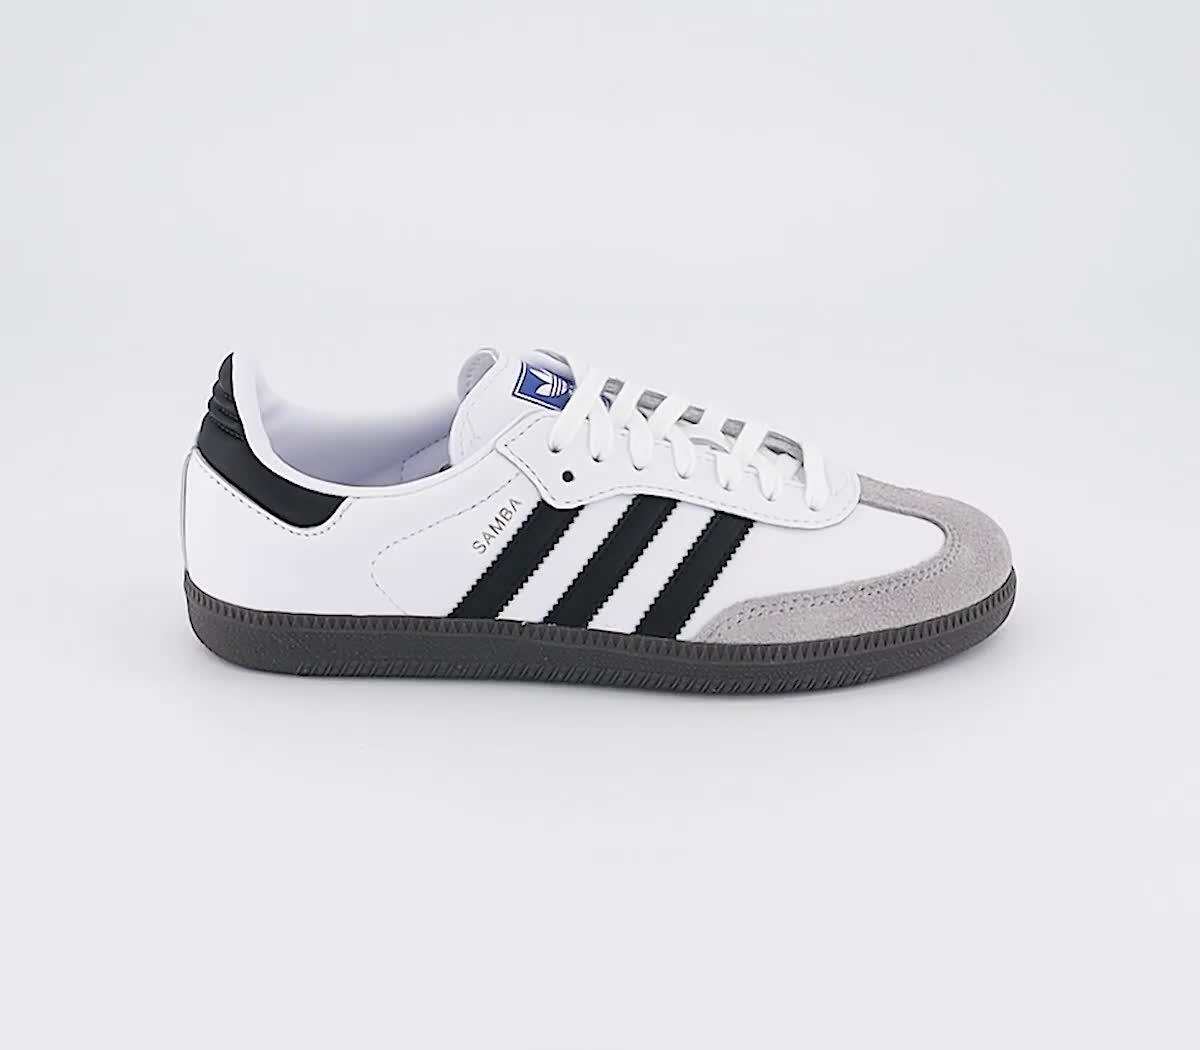

In [13]:
from IPython.display import Image
Image(filename='datasets/sample_photos/samba.jpg', width=224, height=224)

In [15]:
preprocessed_image = prepare_image('samba.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


[[('n04120489', 'running_shoe', 0.9807734),
  ('n04133789', 'sandal', 0.016520139),
  ('n03047690', 'clog', 0.0017500815),
  ('n04200800', 'shoe_shop', 0.0005248182),
  ('n02910353', 'buckle', 0.00010894108)]]

In [17]:
## PREPROCESSING

In [19]:
train_path = 'datasets/shoes1/train'
test_path = 'datasets/shoes1/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input). flow_from_directory(
    directory=train_path, target_size=(224,224),  batch_size=4)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input). flow_from_directory(
    directory=test_path, target_size=(224,224),  batch_size=4, shuffle=False)

assert train_batches.n == 711
assert test_batches.n == 114
assert train_batches.num_classes == test_batches.num_classes == 3

Found 711 images belonging to 3 classes.
Found 114 images belonging to 3 classes.


In [21]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()
print("Current Directory:", os.getcwd())

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

Current Directory: D:\coding\ipynbooks


In [23]:
trainable_params = np.sum([tf.keras.backend.count_params(w) for w in mobile.trainable_weights])
non_trainable_params = np.sum([tf.keras.backend.count_params(w) for w in mobile.non_trainable_weights])

# Print or use these values in assertions
print("Trainable params:", trainable_params)
print("Non-trainable params:", non_trainable_params)

# Now you can use these for your assertions
assert non_trainable_params == 21888
assert trainable_params == 4231976

Trainable params: 4231976
Non-trainable params: 21888


In [33]:
x = mobile.layers[-5].output
x = tf.keras.layers.Flatten()(x)
output = Dense(units=3, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=output)
for layer in model.layers[:-23]:
    layer.trainable = False
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,231,939 (12.33 MB)

 Trainable params: 1,865,731 (7.12 MB)

 Non-trainable params: 1,366,208 (5.21 MB)

In [37]:
# Calculate the number of trainable and non-trainable parameters
trainable_params = np.sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
non_trainable_params = np.sum([tf.keras.backend.count_params(w) for w in model.non_trainable_weights])

# Print or use these values in assertions
print("Trainable params:", trainable_params)
print("Non-trainable params:", non_trainable_params)

# Now you can use these for your assertions
assert non_trainable_params == 1366208
assert trainable_params == 1865731

Trainable params: 1865731
Non-trainable params: 1366208


In [39]:
## TRAINING

In [41]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches, epochs=10, verbose=2)

Epoch 1/10
178/178 - 41s - 228ms/step - accuracy: 0.6385 - loss: 0.8802
Epoch 2/10
178/178 - 32s - 179ms/step - accuracy: 0.8453 - loss: 0.3948
Epoch 3/10
178/178 - 31s - 174ms/step - accuracy: 0.9030 - loss: 0.2816
Epoch 4/10
178/178 - 31s - 174ms/step - accuracy: 0.9451 - loss: 0.1924
Epoch 5/10
178/178 - 32s - 182ms/step - accuracy: 0.9592 - loss: 0.1385
Epoch 6/10
178/178 - 31s - 175ms/step - accuracy: 0.9634 - loss: 0.1254
Epoch 7/10
178/178 - 32s - 178ms/step - accuracy: 0.9550 - loss: 0.1168
Epoch 8/10
178/178 - 32s - 181ms/step - accuracy: 0.9691 - loss: 0.1042
Epoch 9/10
178/178 - 32s - 177ms/step - accuracy: 0.9536 - loss: 0.1202
Epoch 10/10
178/178 - 31s - 176ms/step - accuracy: 0.9634 - loss: 0.1236


In [43]:
## PREDICTION

In [45]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
test_batches.class_indices

{'adidas': 0, 'converse': 1, 'nike': 2}

In [47]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


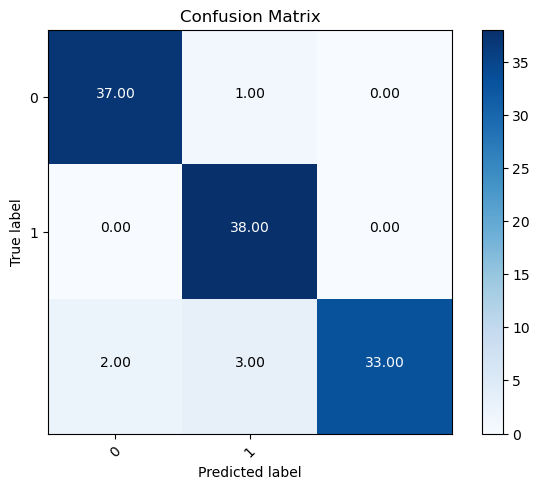

In [49]:
cm_plot_labels = ['0', '1']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
plt.show()

In [50]:
print("Current Directory:", os.getcwd())

Current Directory: D:\coding\ipynbooks


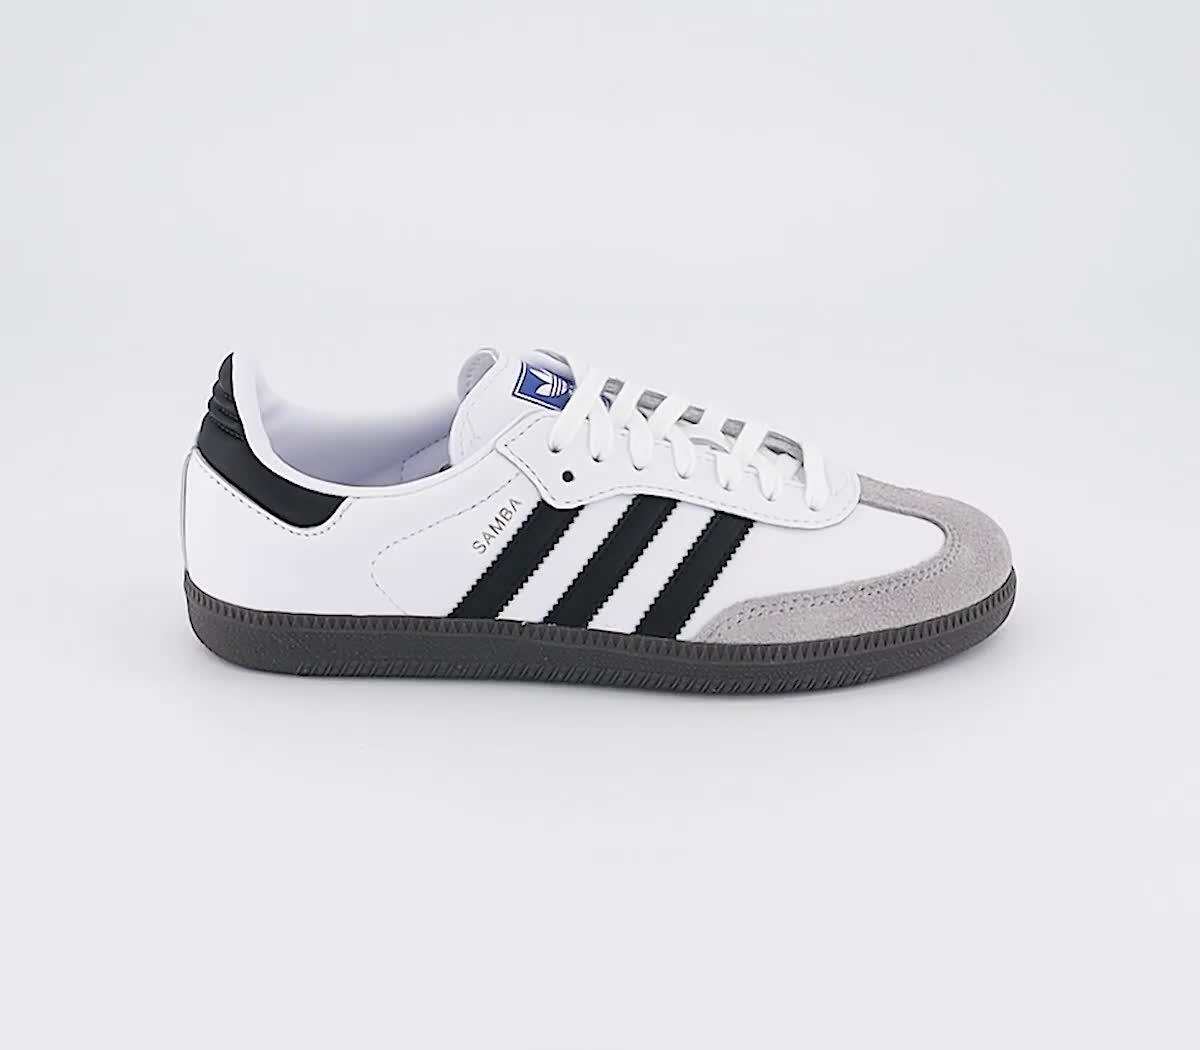

In [53]:
Image(filename='datasets/sample_photos/samba.jpg', width=224, height=224)

In [55]:
# FUNCTION FOR PREDICTING THE IMAGE
def predict_this_image(file_path):
    # load and preprocess
    img = image.load_img(file_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    preprocessed_image = tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

    # make predictions
    predictions = model.predict(preprocessed_image)
    predicted_class = np.argmax(predictions, axis=1)[0]

    # interpret the results
    class_indices = train_batches.class_indices
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_label = class_labels[predicted_class]

    print(f"Predicted Class Index: {predicted_class}")
    print(f"Predicted Label: {predicted_label}")

    return predicted_label

# test the functions w/ an image file
file_path = 'datasets/sample_photos/meow1.jpg'
predicted_label = predict_this_image(file_path)
print(f"This is a: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step
Predicted Class Index: 0
Predicted Label: adidas
This is a: adidas
